# Loading Data into our model for training

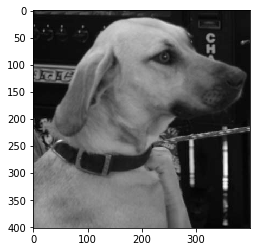

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = '/home/bosecodes/datasets/PetImages'
CATEGORIES = ['Dog', 'Cat']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = 'gray')
        break
    break

In [11]:
print(img_array)
print(img_array.shape)

[[ 43  34  30 ...  17  17  17]
 [ 48  39  36 ...  17  17  17]
 [ 47  40  39 ...  17  17  17]
 ...
 [142 138 134 ...  13  12  12]
 [142 140 138 ...  13  12  11]
 [142 140 138 ...  13  12  11]]
(402, 400)


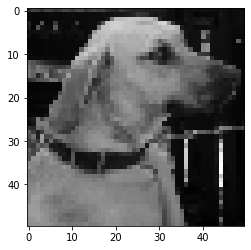

In [16]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [17]:
training_data = []

# for labelling cats and dogs, we take 0 as a dog, 1 as a cat(binary classification)
# CATEGORIES[0] ---> DOG
# CATEGORIES[1] ---> CAT

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
            
create_training_data()

In [18]:
print(len(training_data))

24946


In [19]:
# now shuffle the data

import random

random.shuffle(training_data)

In [21]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
1
1
1
1
1
0
0


In [29]:
X = [] # features
y = [] # labels

In [30]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
# For operations via tf, X has to be a numpy array
# y can be a list or a numpy array

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# The first one is a convention
# The final one is because the images are grayscale

In [34]:
# after having the training data
# make sure to save it
# you do this using the pickle package

import pickle

pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

In [35]:
# if you wanna read this saved data in the future
# you can directly use this operation

pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)

In [36]:
X[1]

array([[[ 44],
        [ 37],
        [ 54],
        ...,
        [180],
        [ 21],
        [ 41]],

       [[ 53],
        [ 57],
        [ 38],
        ...,
        [ 99],
        [ 55],
        [ 72]],

       [[ 49],
        [ 31],
        [ 45],
        ...,
        [155],
        [ 53],
        [ 47]],

       ...,

       [[ 37],
        [ 78],
        [ 42],
        ...,
        [ 95],
        [ 59],
        [ 69]],

       [[ 46],
        [ 78],
        [ 79],
        ...,
        [104],
        [101],
        [ 69]],

       [[ 55],
        [ 92],
        [ 79],
        ...,
        [ 74],
        [ 62],
        [ 58]]], dtype=uint8)

# Building our Convolutional Neural Network

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

x = pickle.load(open('X.pickle', 'rb'))
y = pickle.load(open('y.pickle', 'rb'))

# normalize the data
# scale the image read data
# 0 -255 for image data
# therefore we divide by 255, to convineantly do that,

X = x/255
y = y

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

ValueError: A target array with shape (24946, 50, 50, 1) was passed for an output of shape (None, 11, 11, 1) while using as loss `binary_crossentropy`. This loss expects targets to have the same shape as the output.

In [40]:
import keras
print(keras.__version__)

2.3.1
